In [1]:
import numpy as np

X = np.array([[0, 0, 1],
             [0, 1, 1],
             [1, 0, 1],
             [1, 1, 1]])

D = np.array([[0], [0], [0], [2]])

print(X)
print('----')
print(D)
print('----')
print(X.T)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
----
[[0]
 [0]
 [0]
 [2]]
----
[[0 0 1 1]
 [0 1 0 1]
 [1 1 1 1]]


In [2]:
# sigmoid 정의

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [3]:
# 순방향 연산 함수

def calc_output(W, x):
    v = np.matmul(W, x)  # 행렬의 곱을 지원해주는 함수
    y = sigmoid(v)
    
    return y

In [4]:
# 여기서 에러를 이용한 기울기를 계산하는 함수
# sigmoid 함수의 미분은 sigmoid*(1-sigmoid) 이다

def calc_error(d,y):
    e = d - y  # 참값에서 예측값을 뺸 것이 에러이다.
    delta = y*(1-y)*e
    
    return delta

In [5]:
## 그레이던트 디센트!!
## 이 부분이 중요하다
## 앞부분에서 2차 함수가 핑퐁하는 것을 그레디언트 디센트라고 한다.

def delta_GD(W, X, D, alpha):
    for k in range(4):  # range가 4인 이유는 위 X가 4개의 행으로 이루어졌기 때문이다.
        x = X[k, :].T  # 행렬 의 Transpose  # 행렬의 곱을 위해 transpose를 시켜줌
        d = D[k]
        
        y = calc_output(W, x)
        delta = calc_error(d, y)
        
        dW = alpha*delta*x   # alpha의 역할은 얼만큼의 이동하는지 결정해준다.
        W = W+dW  # 가중치를 업데이트 해주는 것이다.
        
    return W, delta

# 하나의 Weight가 업데이트 하는 과정을 하나의 Epoch라고 한다.

In [6]:
## 학습하자!!

W = 2* np.random.random((1, 3)) -1  # 0을 중앙에 놔두기 위해 기존에 0~1사이에 있는 랜덤 값을 2로 곱해준 후에 1을 빼준다.
alpha = 0.9

hist_W = []
hist_loss = []

for epoch in range(1000):
    W, delta = delta_GD(W, X, D, alpha)
    
    hist_loss.append(delta)
    hist_W.append(W)
    
    if epoch % 100 == 0:
        print(W)

[[-0.37163242 -0.0202466   0.28135397]]
[[ 4.01917582  3.9714618  -5.12073628]]
[[ 5.1486331   5.12459915 -6.76438141]]
[[ 5.81540835  5.79970191 -7.70628221]]
[[ 6.28636495  6.2747613  -8.36297494]]
[[ 6.64967039  6.64049211 -8.86580293]]
[[ 6.94504339  6.93746217 -9.27261053]]
[[ 7.19370719  7.18725514 -9.61388726]]
[[ 7.40831278  7.40270038 -9.90763977]]
[[  7.59700022   7.59203617 -10.16537567]]


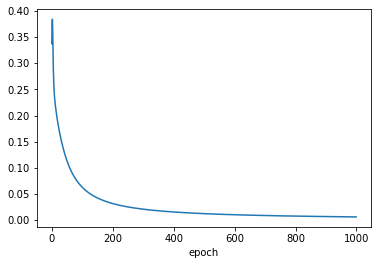

In [7]:
## Epoch당 Loss의 변화

import matplotlib.pyplot as plt

plt.plot(hist_loss)
plt.xlabel('epoch')
plt.show()

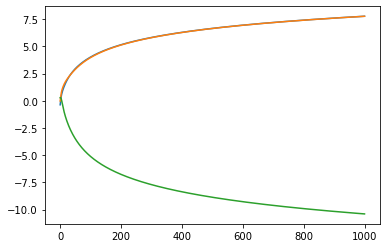

In [8]:
### 가중치의 변화!!

plt.plot(np.array(hist_W).reshape(-1, 3));

In [9]:
N = 4
for k in range(N):
    x = X[k,:].T
    y = calc_output(W,x)
    
    print(y)

[3.06540728e-05]
[0.06701629]
[0.06729527]
[0.99411978]


### 이제 XOR을 해보자!!

In [11]:
## output 계산 함수

def calc_output(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    
    return y, y1

In [12]:
## 출력층 델타 함수

def calc_delta(d, y):
    e = d - y
    delta = y*(1-y) * e
    
    return delta

In [13]:
# 은닉층 델타 함수

def calc_delta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1*(1-y1)* e1
    
    return delta1

In [14]:
'''
!!!! 역전파 알고리즘 코드 !!!!
'''

def backprop_XOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]
        
        y, y1 = calc_output(W1, W2, x)
        delta = calc_delta(d, y)
        delta1 = calc_delta1(W2, delta, y1)
        
        dW1 = (alpha+delta1).reshape(4, 1) * x.reshape(1,3)
        W1 = W1 + dW1
        
        dW2 = alpha * delta * y1
        W2 = W2 + dW2
        
    return W1, W2

In [15]:
### 데이터, 가중치 랜덤  준비

X = np.array([[0,0,1],
             [0, 1, 1],
             [1, 0, 1],
             [1, 1, 1]])

D = np.array([[0], [1], [1], [0]])

W1 = 2*np.random.random((4, 3)) -1   # 4행 3열 랜덤 가중치 생성
W2 = 2*np.random.random((1, 4)) -1   # 1행 4열 랜덤 가중치 생성

In [16]:
## 학습!!!

alpha = 0.9
for epoch in range(10000):
    W1, W2 = backprop_XOR(W1, W2, X, D, alpha)

In [17]:
## 결과 확인!!!

N = 4
for k in range(4):
    x = X[k,:].T
    v1 = np.matmul(W1, x)
    y1 = sigmoid(v1)
    v = np.matmul(W2, y1)
    y = sigmoid(v)
    print(y)

[0.48936057]
[0.48936057]
[0.48936057]
[0.48936057]
